<h1> 신경망의 수학적 구성요소 </h1>

<h3> 2.1 신경망과의 첫 만남 </h3><br>
MNIST = 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제 <br>
딥러닝계의 "hello world" <br>
6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성

In [1]:
from tensorflow import keras

In [2]:
import keras

Using TensorFlow backend.


In [3]:
# MNIST 데이터 셋은 넘파이 배열 형태
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data() # train test split

레이블은 0~9까지 숫자 배열 <br>
이미지와 레이블은 일대일 관계

In [2]:
#train 
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
#test
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


<b>순서</b> <br>
1. train 이미지와 레이블을 네트워크에 주입
2. test 이미지에 대한 예측을 네트워크에 요청
3. 이 예측이 test 레이블과 맞는지 확인

In [4]:
from keras import models
from keras import layers

network = models.Sequential() # 모델 생성
# Dense 층 2개 생성
network.add(layers.Dense(512,activation = 'relu', input_shape=(784,))) 
network.add(layers.Dense(10,activation = 'softmax')) # 10개의 확률 점수가 들어 있는 배열 반환

신경망의 핵심 구성 요소
- 층(layer) = 일종의 데이터 처리 필터
<br>  층은 주어진 문제에 더 의미있는 표현을 입력된 데이터로부터 추출
<br><br>
딥러닝은 간단한 층을 연결하여 구성 <br>
점진적으로 데이터를 정제하는 형태 <br><br>

- 손실 함수 (loss function) : 훈련데이터에서 신경망의 성능을 측정하는 방법
- 옵티마이저 (optimizer) : 손실 함수를 기반으로 네트워크를 업데이트하는 매커니즘
- 훈련과 테스트 과정을 모니터링할 지표 (images)

In [5]:
# 컴파일 단계 
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

데이터를 0~1사이로 스케일을 조정함<br>
<b>(신경망은 입력데이터의 스케일에 민감하여 적절한 데이터 전처리 과정이 필요)</b><br>
이미지는 보통 픽셀의 최댓값인 255로 나누어 사용

In [6]:
# 이미지 데이터 준비
train_images = train_images.reshape((60000,28*28)) # 배열 크기 변환 
train_images = train_images.astype('float32')/255  # float 형태 자료형 변환

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255
# 0~1 사이의 값을 가지는 float32 타입의 (60000, 28*28) 크기인 배열

In [7]:
# 레이블 준비
from keras.utils import to_categorical
# 레이블을 범주형으로 인코딩 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images, train_labels, epochs = 5 , batch_size =128)


Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2605 - accuracy: 0.9244
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1042 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.0692 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0499 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0381 - accuracy: 0.9884


In [9]:
# test set
test_loss , test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/step


In [10]:
print ('test_acc : ', test_acc)
# 훈련 정확도와 테스트 정확도 사이의 차이는 과대 적합 때문
# 과대적합 : 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향

test_acc :  0.982200026512146


<h3> 2.2 신경망을 위한 데이터 표현 </h3><br>

tensor : 데이터를 위한 컨테이너 - 최근 모든 머신 러닝 시스템은 데이터 구조로 사용<br>
(머신러닝의 기본 구성요소)

<h5> 2.2.1 스칼라(= 0D 텐서)</h5>
- 하나의 숫자만 담고 있는 텐서 <br>
- 넘파이에서는 float32 , float64 타입의 숫자가 스칼라 텐서(=배열 스칼라)<br>
- ndim - 넘파이 배열의 축(차원) 개수 확인 (스칼라 텐서는 0)

In [ ]:
# 스칼라
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


<h5>2.2.2 벡터 (1D 텐서)</h5> 
- 숫자의 배열 
- 하나의 축을 가짐




In [ ]:
# 벡터
import numpy as np
x = np.array([12,3,6,14,7]) # 5차원 벡터 != 5차원 텐서 (혼동 주의)
print (x)
print (x.ndim)

[12  3  6 14  7]
1


<h5> 2.2.3 행렬(2D 텐서) </h5>
- 벡터의 배열
- 행(row 가로)  과 열(column 세로)으로 구성

In [ ]:
# 행렬
x = np.array([[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]])
x.ndim

2

<h5> 2.2.4 3D 텐서와 고차원 텐서 </h5>
- 3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐 <BR>
- 딥러닝은 0D ~ 4D 까지  (단 영상 데이터는 5D까지)

In [ ]:
x = np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]]])
x.ndim

3

텐서 3개의 핵심 속성<br>
1. 축의 개수(랭크) : ndim
2. 크기 : shape
3. 데이터 타입 : dtype 
 <br>ex) float32,uint8, float64, char 등 

In [ ]:
# MNIST 데이터 텐서
from keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

# 축의 개수
print(train_images.ndim)
# 배열의 크기
print(train_images.shape)
# 데이터 타입
print(train_images.dtype)

# 8비트 정수형 3D 텐서

3
(60000, 28, 28)
uint8


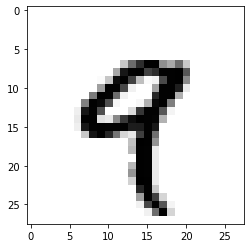

In [ ]:
# 5번째 샘플 확인
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

slicing : 배열에 있는 특정 원소들을 선택하는것

In [ ]:
# 11 번째 에서 101번째 까지(101번 포함 x)
my_slice = train_images[10:100]
print(my_slice.shape)

# 위와 동일 결과
my_slice = train_images[10:100,:,:]
print(my_slice.shape)

# 위와 동일
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


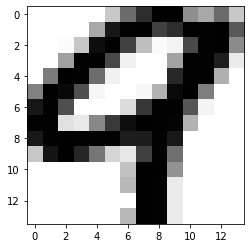

In [ ]:
my_slice = train_images[4,7:-7,7:-7]
plt.imshow (my_slice, cmap=plt.cm.binary)
plt.show()

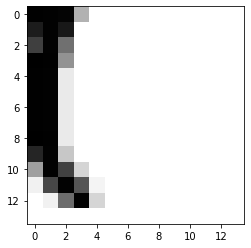

In [ ]:
my_slice = train_images[4,14:,14:]
plt.imshow (my_slice, cmap=plt.cm.binary)
plt.show()

딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축은 샘플 축이다. 
<br> MNIST 예제에서는 숫자 이미지가 샘플
<BR> <b>딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. </b>
- 데이터를 작은 배치로 나눔 


<h5> 2.2.9 벡터 데이터</h5>
- 대부분의 경우 해당<br>
- 배치 데이터는 2D 텐서로 인코딩<br>
- 첫번째 축은 샘플 축 / 두번째 축은 특성 축<br>
ex) 인구통계, 텍스트 문서 데이터 셋 

<h5> 2.2.10 시계열 데이터 또는 시퀸스 데이터</h5>
- 데이터에서 시간이 중요할 때<br>
- 샘플은 벡터의 시퀸스로 인코딩 되어 배치 데이터는 3D 텐서<br>
- 관례적으로 시간 축은 항상 두 번째 축<br>
ex) 주식가격데이터셋, 트윗 데이터 셋

<h5> 2.2.11 이미지 데이터 </h5>
- 높이, 너비, 컬러 채널의 3차원 (3D 텐서)<br>
(흑백은 컬러가 1개라서 차원크기는 1) <br>
- 이미지 텐서의 크기를 지정하는 방식은 2가지<br>
1. 채널 마지막 방식 (텐서플로 방식)
 <br>   (sample, height, width, color_depth) <br>
2. 채널 우선 방식 (씨아노 방식)<br>
(sample, color_depth, height , width) <br>
<b>케라스는 두 형식 모두 지원 </b>

<h5> 2.2.12 비디오 데이터 </h5>
- 5D 텐서<br>
ex) 60초 짜리 144x256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240<br>
배치 - (4,240,144,256,3) <br>
- 용량이 크기 때문에 실생활에서 접하는 비디오는 높은 압축률로 압축되어 있음 

<h3> 2.3 신경망의 톱니바퀴 : 텐서 연산

relu 함수 : 입력이 0보다 크면 입력을 출력 , 0보다 작으면 0 출력

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2
# assert : 뒤에 조건이 true 가 아니면 오류를 냄 (가정 설정문)
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]= max(x[i,j], 0 )

  return x

# 덧셈

def naive_add(x,y):
  assert len(x.shape) ==2
  assert x.shape == y.shape

  x= x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

<b> 브로드캐스팅 </b>
<br>- 크기가 다른 두 텐서가 더하면 작은 텐서가 큰 텐서의 크기에 맞춤
<br> 단계<br>
1. 큰 텐서의 ndim 에 맞도록 작은 텐서에 축이 추가
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복


In [ ]:
import numpy as np
x =np.array([[111,2,3,4],[5,6,7,8],[9,10,11,12]])
print(x.ndim)
print(x.shape)
y = np.array([41,51,31,41])
print(y.ndim)
print(y.shape)

2
(3, 4)
1
(4,)


In [ ]:
print(np.maximum(x,y))
print(np.maximum(x,y).shape)


[[111  51  31  41]
 [ 41  51  31  41]
 [ 41  51  31  41]]
(3, 4)


<b> 텐서 점곱 (텐서 곱셈)</b><br> ??
- 가장 널리 사용되고 유용한 텐서 연산<br>
- dot 연산 사용<br>
- 원소 개수가 같은 벡터끼리 점곱이 가능


<b> 텐서 크기 변환 </b><br>
- reshape 열과 행을 재배열

In [ ]:
x = np.array([[0.,1.],[2.,3.],[4.,5.]])
print(x.shape)

(3, 2)


In [ ]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x =x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
# 전치  : 행과 열을 바꿈
np.transpose(x)

array([[0., 3.],
       [1., 4.],
       [2., 5.]])

<h3> 2.4  신경망의 엔진 : 그래디언트 기반 최적화 </h3>
초기에는 가중치 행렬이 작은 난수로 채워져 있음 (무작위 초기화 단계) = 의미없는 표현 <br>
피드백 신호에 기초하여 가중치가 점진적으로 조정 = 훈련(머신러닝 학습의 핵심)



가중치를 업데이트 하는 방법으로 네트워크의 모든 가중치에 반복을 하면 굉장히 비효율적이다<br>
but 신경망에 사용된 모든 연산이 <b>미분 가능</b> 하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 <b>그래디언트</b>를 계산하는 것이 훨씬 더 좋은 방법

변화율 , 그래디언트 ...

<b> 확률적 경사 하강법 </b><br>
- 함수의 최솟값은 변화율이 0인 지점 <br>
<br>
미니 배치 확률적 경사 하강법 (미니 배치 SGD)
1. 훈련 데이터 x 에 상응하는 타깃 y를 추출
2. x로 fit 하여 y_pred 구함
3. y_pred 와 y 사이의 오차로 손실 구함
4. 손실 함수의 그래디언트를 계산(역방향 패스)
5. 그래디언트의 반대 방향으로 파라미터를 조금 이동<br>

step 값을 적절히 고르는 것이 중요<br>
- 너무 작으면 많은 반복이 필요 & 지역 최솟값에 갇힐 수 있음<br>
- 너무 크면 손실 함수 곡선에서 완전히 임의의 위치로 이동할 수도 있음 <br>

배치 SGD : 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것 <BR>
(더 정확하게 업데이트되지만 더 많은 비용이 듬)<BR>

여러까지 SGD 변종이 많이 있다. <BR>
ex) 모멘텀 사용 SGD , Adagrad, RMSProp 등 <br>
이런 방법들을 최적화방법 = 옵티마이저 라고 부른다<br>

모멘텀 : SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결<BR>
- 현재 기울기 값 뿐만 아니라 현재 속도를 함께 고려하여 각 단계에서 공을 움직임

<B> 변화율 연결 : 역전파 알고리즘 </B> <br>
역전파 알고리즘 : 연쇄 법칙을 신경망의 그래디언트 계산에 적용하여 역전파 알고리즘 (후진 모드 자동 미분) <br>
- 역전파는 최종 손실 값에서부터 시작<br>
- 연쇄 법칙을 적용하야 최상위 층에서 하위층까지 거꾸로 진행<br>

기호 미분 <br>
= 변화율이 알려진 연산들로 연결되어 있으면 네트워크 파라미터와 그래디언트 값을 매핑하는 그래디언트 함수를 계산할 수 있다는 의미 <br>

